<a href="https://colab.research.google.com/github/mesha4545a/Assigment-2/blob/master/Copy_of_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Additional Imports here


<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
302,5,77,82,41,42,35.8,0.156,35,0
379,0,93,100,39,72,43.4,1.021,35,0
24,11,143,94,33,146,36.6,0.254,51,1


In [3]:
df.shape

(768, 9)

**EDA**

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.Outcome.value_counts()
#categorat

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.BMI.value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

- EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data).
- Plots Require:
- Title
- Axis Labels
- Legend
- A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.

Text(0.5, 1.08, 'pairplot for The Dataset')

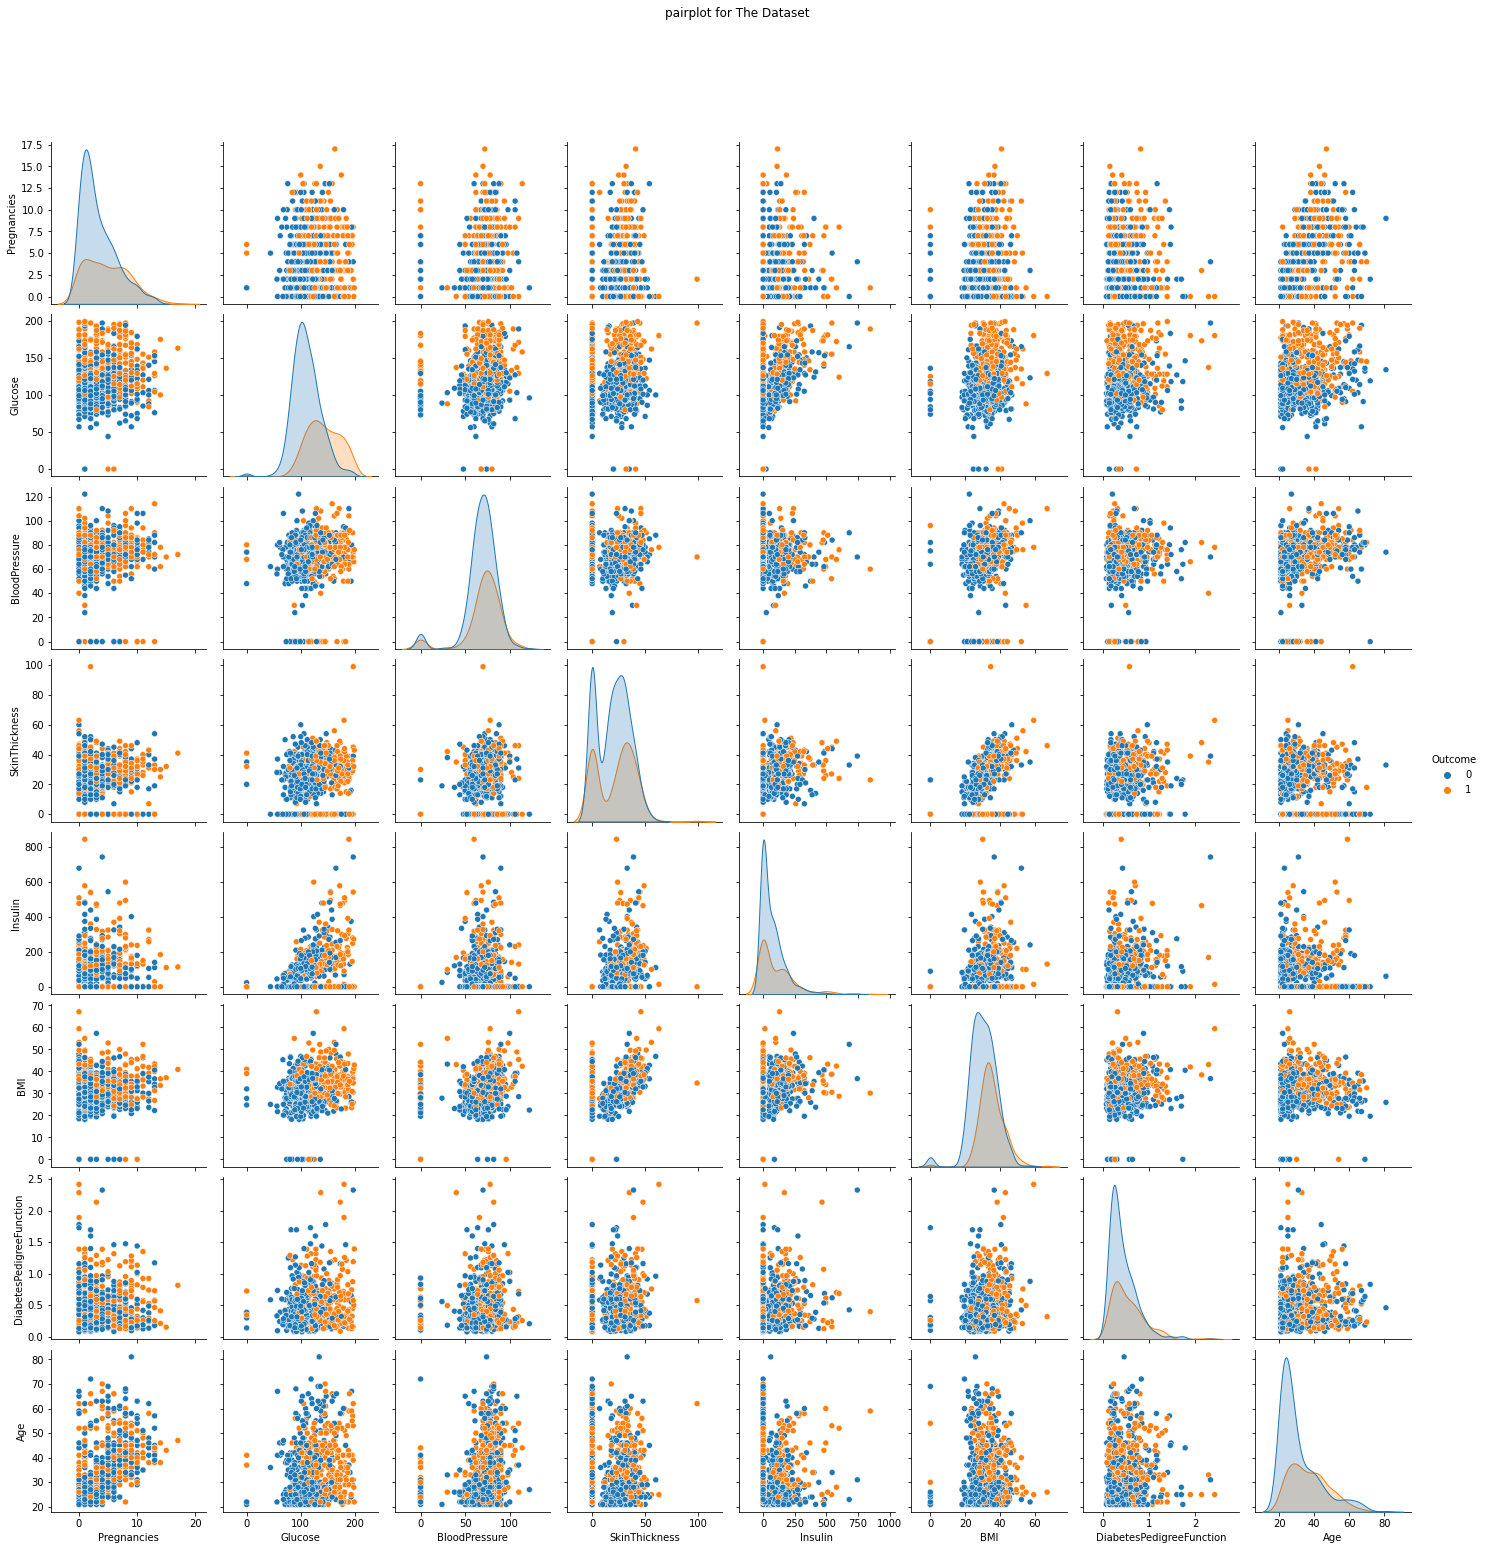

In [10]:
#1
import seaborn as sns
c = sns.pairplot(df, hue='Outcome')
c.fig.suptitle("pairplot for The Dataset", y=1.08)


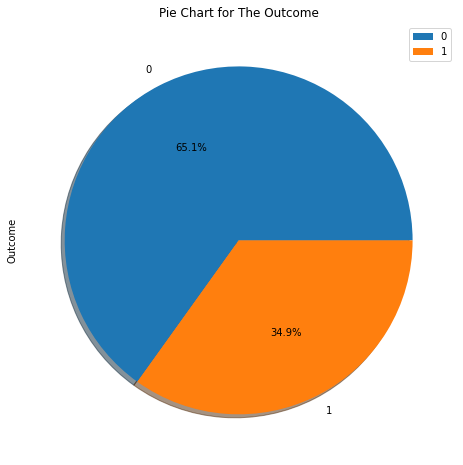

In [11]:
#2
import matplotlib.pyplot as plt
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The Outcome')
plt.legend()
plt.show()

In [12]:
#3
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- 1,3
showes that there is no reail colloration

- 2 shows the persent of 1 and 2 will have 2 more in the predection 

In [69]:
# df.plot(kind='scatter', x='Age', y='BMI')

In [70]:
# plt.scatter( x=df['Glucose'], y=df['BMI'])

split

In [73]:
from sklearn.model_selection import train_test_split
X = df[['Glucose','BMI','Age']]
# X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=6)

Baseline *Model*

In [27]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class)

baseline_model(n_predictions, baseline_value)

0      0
1      0
2      0
3      0
4      0
      ..
149    0
150    0
151    0
152    0
153    0
Length: 154, dtype: int64

In [80]:
from sklearn.metrics import accuracy_score

preds =baseline_model(n_predictions, baseline_value)

bs = accuracy_score(y_test, preds)
bs

0.6688311688311688

Scale Data

In [71]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# scaler.transform(X)

In [74]:
cols = X.columns 
scaler = StandardScaler()
# X = df[['Glucose','BMI','Age']]
# # X = df.drop(['Outcome'], axis=1)
# y = df['Outcome']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=6)

X = df[['Glucose','BMI','Age']]
y = df['Outcome']
X = scaler.fit_transform(X)
# befor spliting and after x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=6)


In [54]:

pd.DataFrame(X, columns=cols)

,Glucose,BMI,Age
0,0.848324,0.204013,1.425995
1,-1.123396,-0.684422,-0.190672
2,1.943724,-1.103255,-0.105584
3,-0.998208,-0.494043,-1.041549
4,0.504055,1.409746,-0.020496
...,...,...,...
763,-0.622642,0.115169,2.532136
764,0.034598,0.610154,-0.531023
765,0.003301,-0.735190,-0.275760
766,0.159787,-0.240205,1.170732


Create Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
pre = lr.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [79]:
lrs= accuracy_score(y_test, pre)
lrs

0.7792207792207793

In [84]:
if lrs > bs:
  print(f"Logistic Regression model is more accurat {lrs}")
else:
   print(f"baseline_model is more accurat {bs}")

Logistic Regression model is more accurat 0.7792207792207793


Perform PCA

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
pca.singular_values_

array([32.34603498, 27.21395667, 22.7405933 ])

In [62]:
pca.fit_transform(X_train)


array([[ 1.46143035,  0.78042476,  0.43491191],
       [-0.53249088, -1.5540704 , -0.67175572],
       [ 1.59439681, -0.73542549, -0.72797583],
       ...,
       [-0.41095893,  1.29250294, -0.66392079],
       [-0.68951013, -1.09557278,  1.02937768],
       [ 0.67730917, -0.18359795,  1.13936821]])

In [64]:
pd.DataFrame(pca.fit_transform(X_train))

,0,1,2
0,1.461430,0.780425,0.434912
1,-0.532491,-1.554070,-0.671756
2,1.594397,-0.735425,-0.727976
3,0.113230,-0.975484,0.747529
4,-0.086735,0.439652,-0.093874
...,...,...,...
609,-1.478678,-2.014085,0.384718
610,0.515229,-0.355518,-0.491869
611,-0.410959,1.292503,-0.663921
612,-0.689510,-1.095573,1.029378


In [65]:
lr = LogisticRegression()

X_train = pca.fit_transform(X_train)

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
X_test = pca.fit_transform(X_test)

preds = lr.predict(X_test)

In [85]:
accLgP = accuracy_score(y_test, preds)
accLgP

0.6688311688311688

In [87]:
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic with Scale' , 'Logistic with PCA' ]
accuracies['values'] = [bs  , lrs , accLgP]

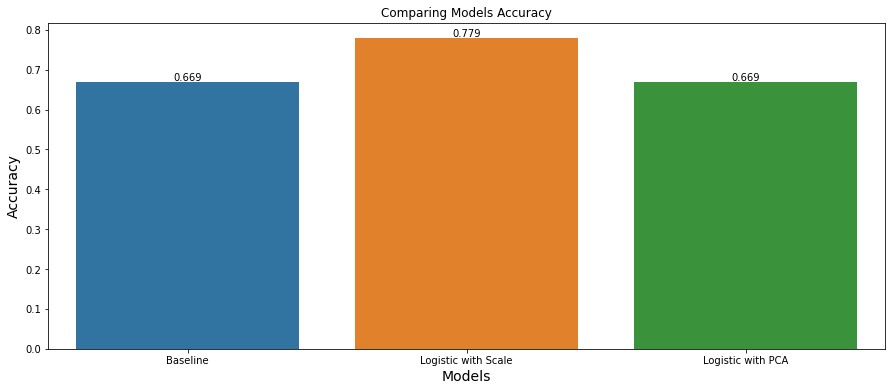

In [89]:

plt.figure(figsize=(15, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy');